# Final project : Recommender System - Part 1

## Exploratory Data Analysis on Online Course Enrollment Data

- Identify keywords in course titles using a WordCloud

- Calculate the summary statistics and visualizations of the online course content dataset

- Determine popular course genres

- Calculate the summary statistics and create visualizations of the online course enrollment dataset

- Identify courses with the greatest number of enrolled students

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [4]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

In [6]:
course_df.head()


,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [7]:
course_df.shape

(307, 16)

In [8]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   COURSE_ID        307 non-null    object
 1   TITLE            307 non-null    object
 2   Database         307 non-null    int64 
 3   Python           307 non-null    int64 
 4   CloudComputing   307 non-null    int64 
 5   DataAnalysis     307 non-null    int64 
 6   Containers       307 non-null    int64 
 7   MachineLearning  307 non-null    int64 
 8   ComputerVision   307 non-null    int64 
 9   DataScience      307 non-null    int64 
 10  BigData          307 non-null    int64 
 11  Chatbot          307 non-null    int64 
 12  R                307 non-null    int64 
 13  BackendDev       307 non-null    int64 
 14  FrontendDev      307 non-null    int64 
 15  Blockchain       307 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 38.5+ KB


##### Plot a Word Cloud from Course Titles

In [9]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [10]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

In [11]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=600, height=400)

In [12]:
wordcloud.generate(titles)

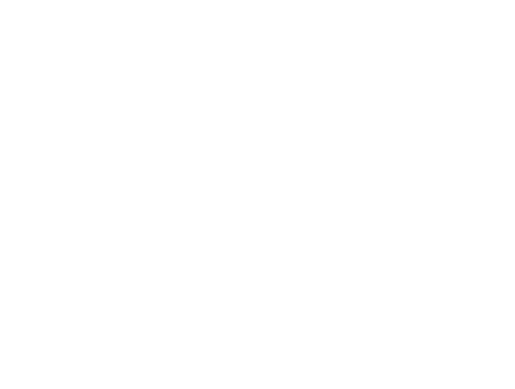

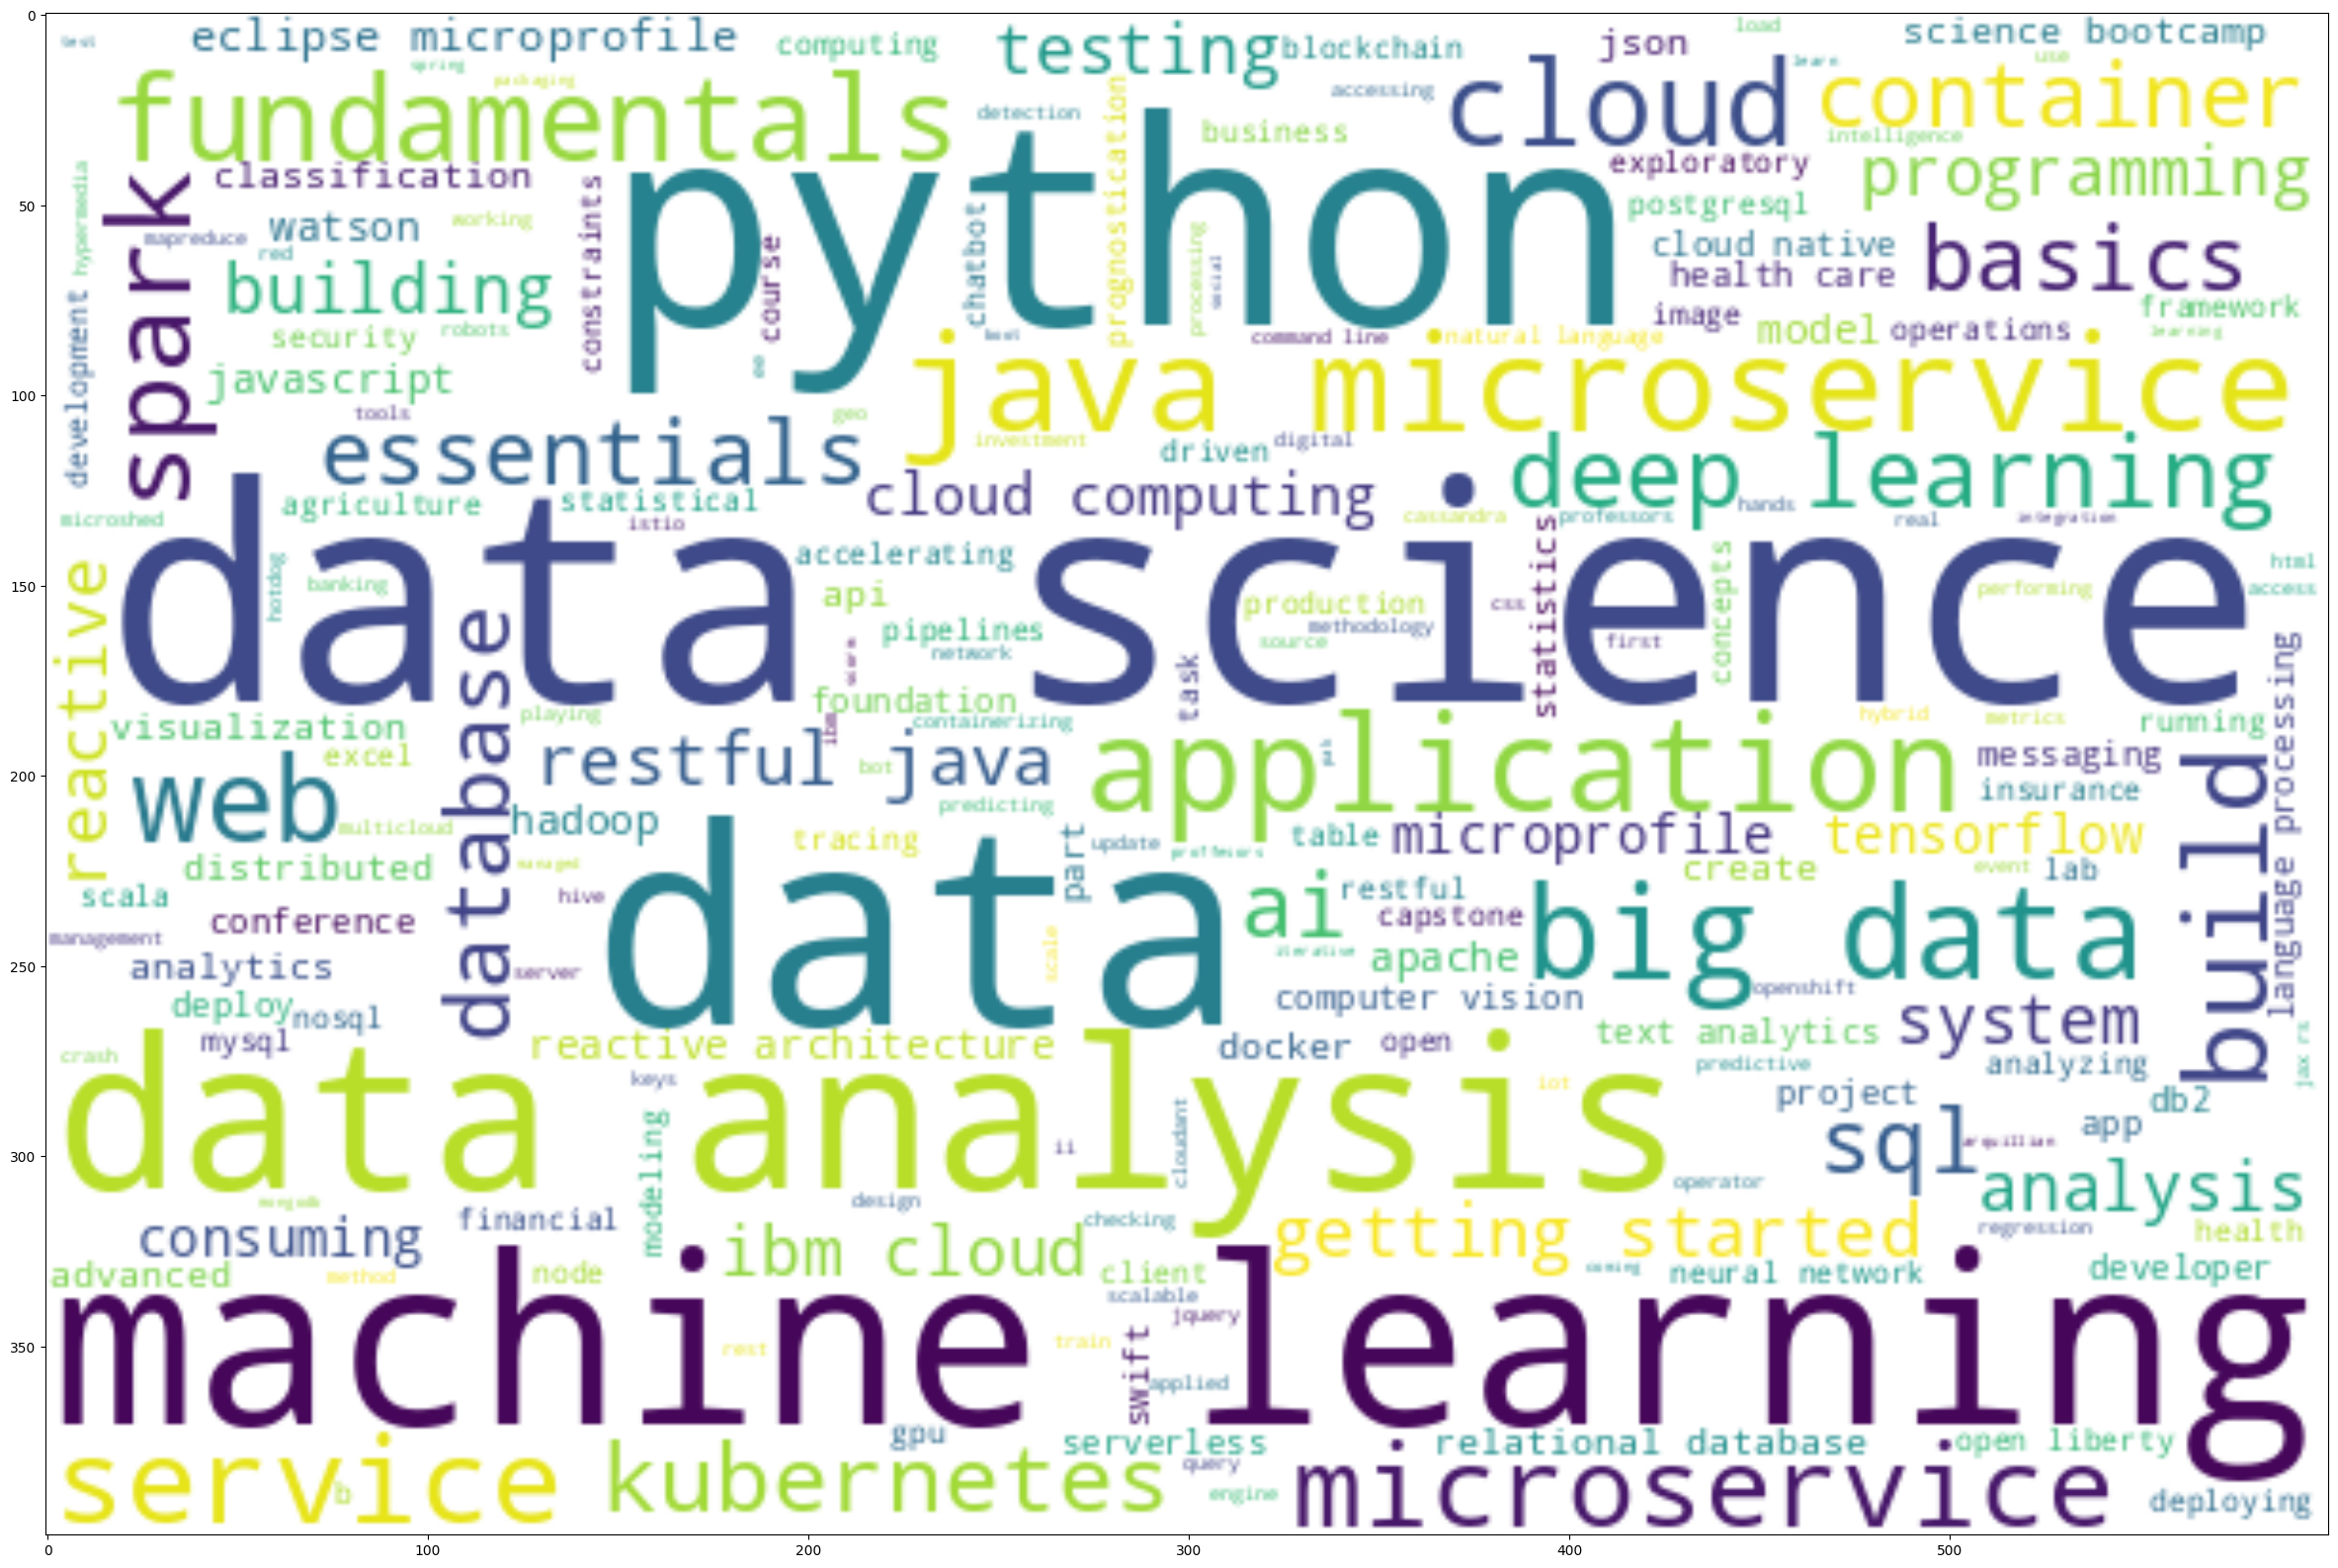

In [13]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the wordcloud, there are many popular IT related keywords such as python, data science, machine learning, big data, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

In [14]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

In [15]:
genre_sums = course_df[genres].sum(axis=0)

In [16]:
genre_sums = pd.DataFrame(genre_sums, columns = ['Count']).sort_values(by = "Count", ascending=False)

In [17]:
genre_sums

,Count
BackendDev,78
MachineLearning,69
Database,60
DataAnalysis,56
DataScience,38
CloudComputing,37
BigData,36
Python,28
FrontendDev,19
Containers,17


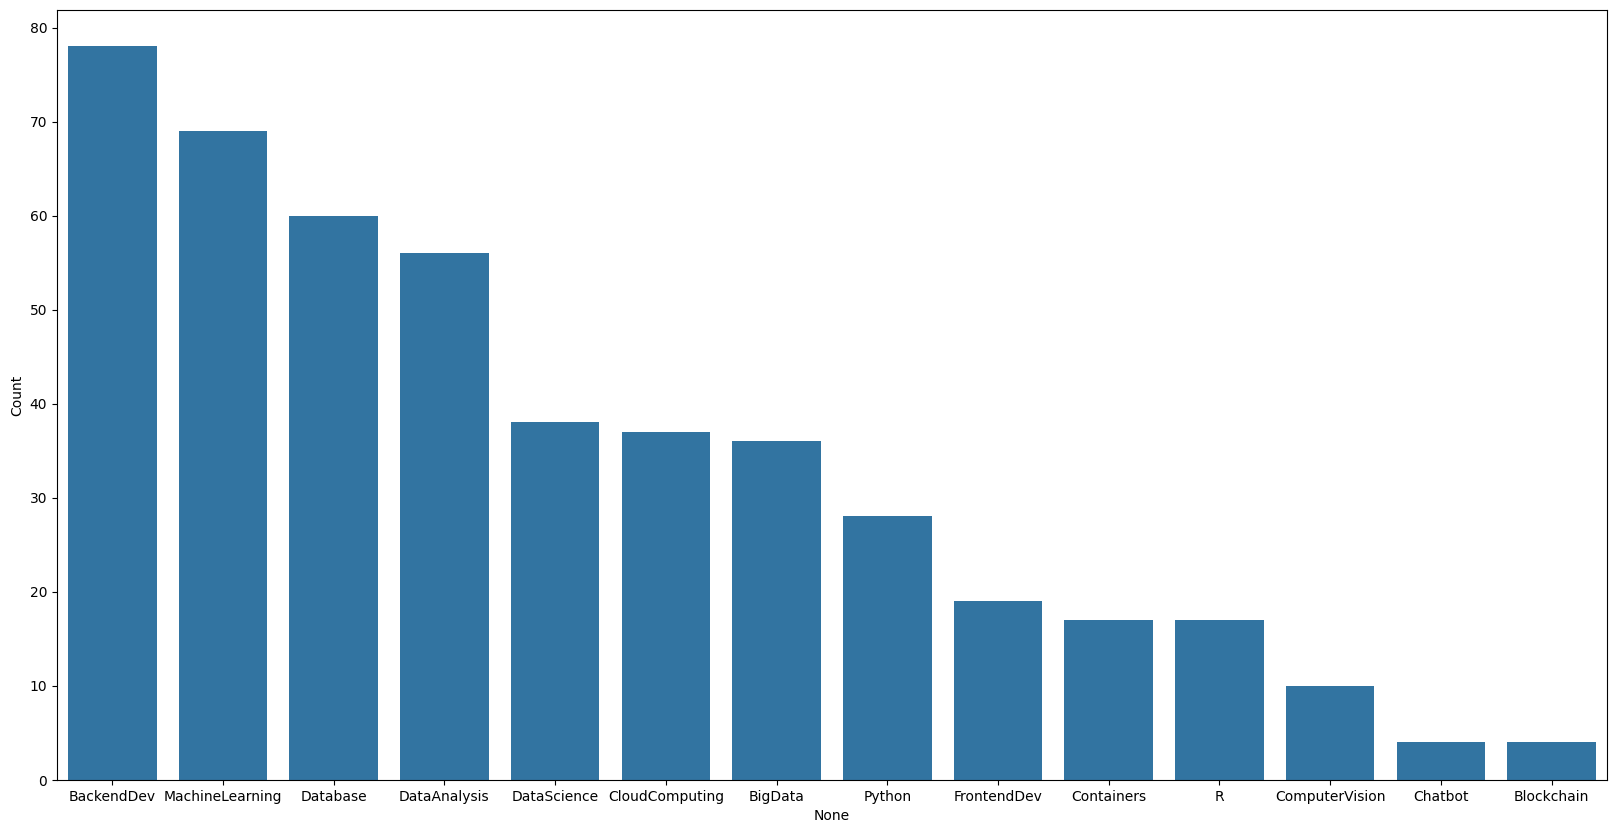

In [18]:
plt.figure(figsize = (20,10))
sns.barplot(x=genre_sums.index, y="Count", data=genre_sums)
# Show the plot
plt.show()

#### Analyze Course Enrollments

The **rating** column consists of three potential values:

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners.

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements.

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.

In [19]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [20]:
ratings_df.shape

(233306, 3)

In [21]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233306 entries, 0 to 233305
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   user    233306 non-null  int64 
 1   item    233306 non-null  object
 2   rating  233306 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.3+ MB


In [22]:
ratings_df['rating'].unique()

array([5, 3, 4])

In [23]:
ratings_df['user'].nunique() # unique user

33901

In [24]:
user_count = ratings_df.groupby('user').size()

In [25]:
user_count = pd.DataFrame(user_count, columns = ['Count']).sort_values(by = "Count", ascending=False)

In [26]:
user_count.head(25) #rating count for each user

,Count
user,
2,61
5,59
924030,51
1653994,51
1761291,50
1559851,50
382781,50
746163,50
971917,50


In [27]:
user_count.describe()

,Count
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


<Figure size 1000x600 with 0 Axes>

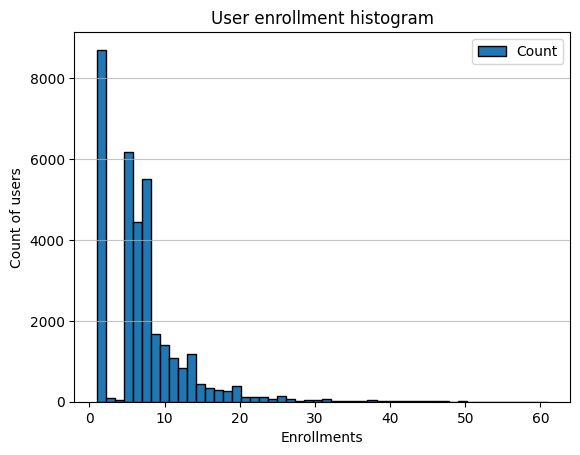

In [28]:
#user enrollment histogram

plt.figure(figsize=(10, 6))
user_count.plot(kind='hist', bins=50, edgecolor='black')
plt.title('User enrollment histogram')
plt.xlabel('Enrollments')
plt.ylabel('Count of users')
plt.grid(axis='y', alpha=0.75)
plt.show()

#### Top-20 Most Popular Courses

In [29]:
ratings_df['item'].nunique()

126

In [30]:
items = ratings_df.groupby(['item']).size().reset_index(name='count').sort_values(by='count', ascending=False)

In [31]:
items

,item,count
101,PY0101EN,14936
54,DS0101EN,14477
4,BD0101EN,13291
5,BD0111EN,10599
42,DA0101EN,8303
...,...,...
113,ST0201EN,1
114,ST0301EN,1
66,DX0106EN,1
68,DX0108EN,1


In [32]:
Courses = items.merge(course_df[['COURSE_ID', 'TITLE']], how='left', left_on='item', right_on='COURSE_ID')

In [33]:
Courses

,item,count,COURSE_ID,TITLE
0,PY0101EN,14936,PY0101EN,python for data science
1,DS0101EN,14477,DS0101EN,introduction to data science
2,BD0101EN,13291,BD0101EN,big data 101
3,BD0111EN,10599,BD0111EN,hadoop 101
4,DA0101EN,8303,DA0101EN,data analysis with python
...,...,...,...,...
121,ST0201EN,1,ST0201EN,statistics 201
122,ST0301EN,1,ST0301EN,statistics 301
123,DX0106EN,1,DX0106EN,data science bootcamp with r for university pr...
124,DX0108EN,1,DX0108EN,data science bootcamp with python for universi...


In [34]:
Courses1 = Courses[[ 'TITLE','count']]

In [35]:
Courses1.head(20)

,TITLE,count
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [36]:
Courses_rating = Courses.merge(ratings_df[['item','rating']], how='left', left_on='item', right_on='item')

In [37]:
Courses_rating1 = Courses_rating[['TITLE','rating','count']]

In [38]:
rating_prom = Courses_rating1.groupby('TITLE')['rating'].mean().reset_index(name='rating_mean').sort_values(by='rating_mean', ascending=False)

In [39]:
rating_prom.head(20)

,TITLE,rating_mean
33,data science bootcamp with r for university pr...,5.000000
32,data science bootcamp with python for universi...,5.000000
107,statistics 301,5.000000
3,ai for everyone master the basics,4.500000
43,db2 fundamentals i,4.500000
80,predicting financial performance of a company,4.222222
4,analyzing big data in r using apache spark,4.045374
19,cloud native security conference data security,4.043526
94,scalable web applications on kubernetes,4.043062
23,data ai jumpstart your journey,4.042904


array([[<Axes: title={'center': 'rating_mean'}>]], dtype=object)

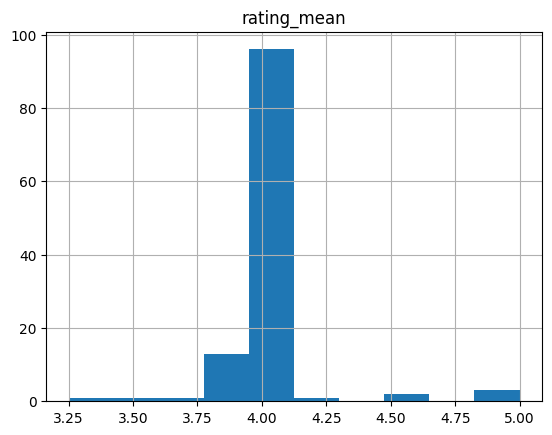

In [40]:
rating_prom.hist()

##  Content-based recommender system using user profile and course genres

In [41]:
profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
profile_df = pd.read_csv(profile_genre_url)

In [42]:
profile_df.head() #The profile dataframe contains the course interests for each user

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [43]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
test_users_df = pd.read_csv(test_users_url)

In [44]:
test_users_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [45]:
test_users_df.shape

(233306, 3)

In [46]:
#Let's look at how many test users we have in the dataset.
# Group the test users DataFrame by the 'user' column and find the maximum value for each group,
# then reset the index and drop the old index to obtain a DataFrame with unique user IDs
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)

# Extract the 'user' column from the test_users DataFrame and convert it to a list of user IDs
test_user_ids = test_users['user'].to_list()

# Print the total number of test users by obtaining the length of the test_user_ids list
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 33901


In [47]:
#Then for each test user in the test dataset, you need to first find out which courses are unknown/unselected to them. For example, suppose we have a user 1078030 with profile
test_user_profile = profile_df[profile_df['user'] == 1078030]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
18204,1078030,0.0,12.0,0.0,9.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [49]:
enrolled_courses = test_users_df[test_users_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)

In [50]:
all_courses = set(course_df['COURSE_ID'].values)
all_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

In [51]:
#Then we can use all courses to subtract the enrolled courses to get a set of all unknown courses for user 1078030, and we want to find potential interested courses hidden in the unknown course list.

unknown_courses = all_courses.difference(enrolled_courses)
unknown_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

In [52]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 60

In [53]:
def generate_recommendation_scores():
    """
    Generate recommendation scores for users and courses.

    Returns:
    users (list): List of user IDs.
    courses (list): List of recommended course IDs.
    scores (list): List of recommendation scores.
    """

    users = []      # List to store user IDs
    courses = []    # List to store recommended course IDs
    scores = []     # List to store recommendation scores

    # Iterate over each user ID in the test_user_ids list
    for user_id in test_user_ids:
        # Get the user profile data for the current user
        test_user_profile = profile_df[profile_df['user'] == user_id]

        # Get the user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values

        # Get the known course ids for the current user
        enrolled_courses = test_users_df[test_users_df['user'] == user_id]['item'].to_list()

        # Calculate the unknown course ids
        unknown_courses = all_courses.difference(enrolled_courses)

        # Filter the course_genres_df to include only unknown courses
        unknown_course_df = course_df[course_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = unknown_course_df['COURSE_ID'].values

        # Calculate the recommendation scores using dot product
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_user_vector)

        # Append the results into the users, courses, and scores list
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]

            # Only keep the courses with high recommendation score
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])

    return users, courses, scores



In [54]:
# Call the generate_recommendation_scores function to obtain recommendation scores for users and courses,
# and assign the returned lists to variables users, courses, and scores
users, courses, scores = generate_recommendation_scores()

# Create an empty dictionary named res_dict to store the results of the recommendation process
res_dict = {}

# Store the lists of users, courses, and scores into the res_dict dictionary with corresponding keys
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

# Create a DataFrame named res_df using the res_dict dictionary, specifying the column order as ['USER', 'COURSE_ID', 'SCORE']
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])

# Save the res_df DataFrame to a CSV file named "profile_rs_results.csv" without including the index
res_df.to_csv("profile_rs_results.csv", index=False)

# Output the res_df DataFrame
res_df



,USER,COURSE_ID,SCORE
0,2,DE0205EN,86.0
1,2,PA0103EN,62.0
2,2,PA0107EN,62.0
3,2,GPXX0IBEN,105.0
4,2,SW0201EN,73.0
...,...,...,...
14753,2089981,GPXX0IBEN,69.0
14754,2089981,TA0106EN,66.0
14755,2089981,GPXX0TY1EN,60.0
14756,2089981,excourse72,72.0


- On average, how many new courses have been recommended per test user?
- What are the most frequently recommended courses? Return the top-10 commonly recommended courses across all test users.

In [55]:
recommended_courses_per_user = res_df.groupby('USER').size()

average_recommended_courses_per_user = recommended_courses_per_user.mean()
round(average_recommended_courses_per_user,0)

12.0

In [56]:
course_recommendation_counts = res_df['COURSE_ID'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

In [57]:

top_10_courses = course_recommendation_counts.head(10)
top_10_courses


,COURSE_ID,count
0,excourse73,1044
1,excourse72,1044
2,TMP0105EN,926
3,excourse31,672
4,RP0105EN,559
5,SC0103EN,558
6,excourse05,546
7,GPXX0M6UEN,546
8,excourse71,546
9,excourse70,546


In [58]:
top_10_courses = top_10_courses.merge(course_df[['TITLE','COURSE_ID']], how='inner', left_on='COURSE_ID', right_on='COURSE_ID')

In [59]:
top_10_courses[['TITLE', 'count']]

,TITLE,count
0,analyzing big data with sql,1044
1,foundations for big data analysis with sql,1044
2,getting started with the data apache spark ma...,926
3,cloud computing applications part 2 big data...,672
4,analyzing big data in r using apache spark,559
5,spark overview for scala analytics,558
6,\r\ndistributed computing with spark sql,546
7,using the cql shell to execute keyspace operat...,546
8,big data essentials hdfs mapreduce and spark...,546
9,big data capstone project,546


## Content-based Course Recommender System using Course Similarities

In [60]:
sim_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/sim.csv"

The similarity matrix is a real number, symmetric metric with each element representing the similarity value (ranged 0 to 1) between course index `i` and course index `j`.

In [61]:
sim_df = pd.read_csv(sim_url)
sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,1.000000,0.088889,0.088475,0.065556,0.048810,0.104685,0.065202,0.143346,0.000000,0.024405,...,0.012695,0.070225,0.058224,0.046610,0.025850,0.033944,0.076825,0.072898,0.039276,0.121113
1,0.088889,1.000000,0.055202,0.057264,0.012182,0.078379,0.032545,0.119251,0.044162,0.000000,...,0.180593,0.124631,0.087187,0.093060,0.019354,0.028239,0.063911,0.138270,0.031367,0.076940
2,0.088475,0.055202,1.000000,0.026463,0.039406,0.000000,0.000000,0.154303,0.000000,0.000000,...,0.040996,0.037796,0.013430,0.037630,0.000000,0.018270,0.082698,0.133400,0.012684,0.000000
3,0.065556,0.057264,0.026463,1.000000,0.000000,0.250490,0.390038,0.000000,0.000000,0.000000,...,0.151882,0.420084,0.427908,0.055764,0.000000,0.094759,0.030638,0.017443,0.018796,0.158073
4,0.048810,0.012182,0.039406,0.000000,1.000000,0.000000,0.000000,0.085126,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.096877,0.000000,0.060474,0.030415,0.129871,0.000000,0.000000


<Axes: >

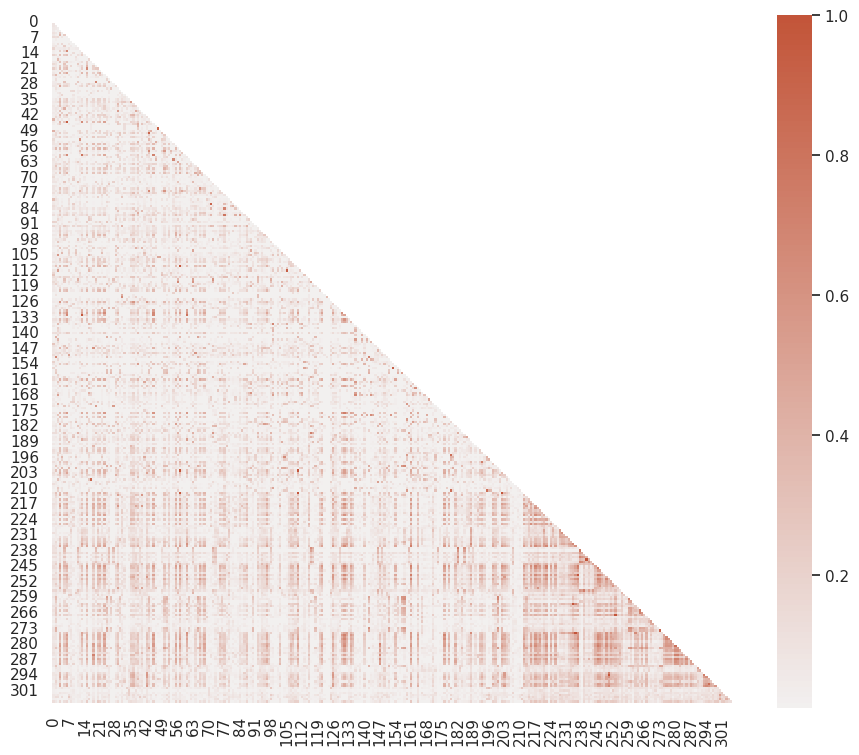

In [62]:
# Configure seaborn to set the plot style to 'white'
sns.set_theme(style="white")

# Create a mask for the upper triangle of the similarity matrix
mask = np.triu(np.ones_like(sim_df, dtype=bool))

# Create a new figure and axis for the heatmap
_, ax = plt.subplots(figsize=(11, 9))

# Create a diverging color palette for the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot a similarity heat map using seaborn's heatmap function
sns.heatmap(sim_df, mask=mask, cmap=cmap, vmin=0.01, vmax=1, center=0,
            square=True)


As we can see from the heatmap; there are many hot spots, which means many courses are similar to each other. Such patterns suggest that it is possible to build a recommender system based on course similarities.

In [63]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_df = pd.read_csv(course_url)
bow_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/courses_bows.csv"
bow_df = pd.read_csv(bow_url)

In [64]:
course_df.head()

,COURSE_ID,TITLE,DESCRIPTION
0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...
1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...
2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...
3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...


In [65]:
course_df.shape

(307, 3)

In [66]:
bow_df.head()

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1


First, we want to mention that the matrix indices are course indices (such as `0, 1, 2, 3`). Very often we need to query the actual course ids (such as `ML0151EN` and `ML0101ENv3`) based on course indices and vice versa. We can save the course id's and indices into two dictionaries for late queries:

In [67]:
# Create course id to index and index to id mappings
def get_doc_dicts(bow_df):
    # Group the DataFrame by course index and ID, and get the maximum value for each group
    grouped_df = bow_df.groupby(['doc_index', 'doc_id']).max().reset_index(drop=False)
    # Create a dictionary mapping indices to course IDs
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    # Create a dictionary mapping course IDs to indices
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    # Clean up temporary DataFrame
    del grouped_df
    return idx_id_dict, id_idx_dict

#### Find courses which are similar enough to your enrolled courses

In [68]:
enrolled_course_ids = ['PY0101EN','DX0108EN'] # add your interested courses id to the list

In [69]:
enrolled_courses = course_df[course_df['COURSE_ID'].isin(enrolled_course_ids)]
enrolled_courses

,COURSE_ID,TITLE,DESCRIPTION
13,DX0108EN,data science bootcamp with python for universi...,data science bootcamp with python for universi...
188,PY0101EN,python for data science,this beginner friendly python course will take...


In [70]:
all_courses = set(course_df['COURSE_ID'])

In [71]:
unselected_course_ids = all_courses.difference(enrolled_course_ids)
unselected_course_ids

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX

In [72]:
idx_id_dict, id_idx_dict = get_doc_dicts(bow_df)
idx1 = id_idx_dict['PY0101EN']
idx2 = id_idx_dict['DX0108EN']
print(f"Course 1's index is {idx1} and Course 2's index is {idx2}")

Course 1's index is 188 and Course 2's index is 13


In [74]:
sim_matrix = sim_df.to_numpy()

In [75]:
sim_matrix

array([[1.        , 0.08888902, 0.08847479, ..., 0.07289804, 0.03927644,
        0.12111335],
       [0.08888902, 1.        , 0.0552023 , ..., 0.13826971, 0.03136748,
        0.0769405 ],
       [0.08847479, 0.0552023 , 1.        , ..., 0.13340002, 0.01268366,
        0.        ],
       ...,
       [0.07289804, 0.13826971, 0.13340002, ..., 1.        , 0.22015908,
        0.12890232],
       [0.03927644, 0.03136748, 0.01268366, ..., 0.22015908, 1.        ,
        0.1262741 ],
       [0.12111335, 0.0769405 , 0.        , ..., 0.12890232, 0.1262741 ,
        1.        ]])

In [76]:
sim = sim_matrix[idx1][idx2]
sim

0.4372865332880968

In [149]:
def generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    # Set a threshold for similarity
    threshold = 0.55
    # Iterate over enrolled courses
    for enrolled_course in enrolled_course_ids:
        # Iterate over unselected courses
        for unselect_course in unselected_course_ids:
            # Check if both enrolled and unselected courses exist in the id_idx_dict
            if enrolled_course in id_idx_dict and unselect_course in id_idx_dict:
                # Initialize similarity value
                enrolled_index = id_idx_dict[enrolled_course]
                unselected_index = id_idx_dict[unselect_course]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[enrolled_index][unselected_index]


                # Check if the similarity exceeds the threshold
                if sim > threshold:
                    # Update recommendation dictionary with course ID and similarity score
                    if unselect_course not in res:
                        res[unselect_course] = sim
                    else:
                        if sim >= res[unselect_course]:
                            res[unselect_course] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}


    # Return the recommendation dictionary
    return res


In [135]:
my_recommendations = generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix)

In [136]:
my_recommendations

{'DX0106EN': 0.9476225544736294,
 'CB0101EN': 0.9233805168766388,
 'TMP0101EN': 0.8894991799933215,
 'DX0107EN': 0.816496580927726,
 'DX0108EN': 0.7999999999999999,
 'excourse24': 0.7526312050490548,
 'excourse36': 0.7397041774816828,
 'excourse23': 0.7397041774816828,
 'excourse32': 0.7220184676669504,
 'excourse63': 0.7154357701654478,
 'excourse67': 0.7082138557765277,
 'excourse72': 0.7036476305124202,
 'excourse46': 0.6892532539898828,
 'excourse38': 0.6816378987999318,
 'excourse47': 0.6800651961945685,
 'excourse65': 0.672421398852244,
 'excourse33': 0.6645087922452757,
 'excourse68': 0.6528639873857345,
 'excourse74': 0.6500714712738288,
 'excourse22': 0.6475015976638527,
 'excourse62': 0.6475015976638527,
 'excourse04': 0.6377928041432808,
 'excourse28': 0.6237538183537886,
 'excourse60': 0.6155678409534919,
 'excourse09': 0.6087807775281011,
 'excourse25': 0.6005354126741058,
 'CC0120EN': 0.5995560487738423,
 'excourse64': 0.5978729561853303,
 'GPXX0UMSEN': 0.5922801330182955

In [141]:

my_recommendations_1 = pd.DataFrame.from_dict(my_recommendations, orient='index', columns=['similarity'])


my_recommendations_1 = my_recommendations_1.reset_index().rename(columns={'index': 'course'})










In [142]:
my_recommendations_1

,course,similarity
0,DX0106EN,0.947623
1,CB0101EN,0.923381
2,TMP0101EN,0.889499
3,DX0107EN,0.816497
4,DX0108EN,0.800000
5,excourse24,0.752631
6,excourse36,0.739704
7,excourse23,0.739704
8,excourse32,0.722018
9,excourse63,0.715436


In [143]:
recommended_course_ids = my_recommendations_1['course']

filtered_courses_df = course_df[course_df['COURSE_ID'].isin(recommended_course_ids)]


def print_recommended_courses(df):
    print("My recommended courses are:")
    print("====================")
    for index, row in df.iterrows():
        print(f"• {row['TITLE']}")


print_recommended_courses(filtered_courses_df)

My recommended courses are:
• data science bootcamp with r for university proffesors
• data science bootcamp with python for university professors  advance 
• text analysis
• an introduction to ibm cloud satellite
• data analysis using r 101
• data science bootcamp with python for university professors
• build your own chatbots
• integrating restful services with a reactive system
• 
sql for data science
• 
distributed computing with spark sql
• process data from dirty to clean
• introduction to data science in python
• data analysis using python
• introduction to cloud computing
• cloud computing basics  cloud 101 
• fundamentals of cloud computing
• introduction to data analytics
• excel basics for data analysis
• data analysis using python
• data analysis with r programming
• data analysis with python
• machine learning
• machine learning for all
• introduction to tensorflow for artificial intelligence  machine learning  and deep learning
• introduction to data science in python
• a

#### Generate course recommendations based on course similarities for all test uesrs

In [104]:
test_users_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


In [150]:
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 33901


In [151]:

enrolled_course_ids_dict = test_users.groupby('user')['item'].agg(list).to_dict()

print(enrolled_course_ids_dict)


{2: ['WA0101EN'], 4: ['WA0103EN'], 5: ['WA0103EN'], 7: ['BD0211EN'], 8: ['RP0105EN'], 9: ['RP0105EN'], 12: ['TMP0105EN'], 16: ['PY0101EN'], 17: ['TA0105'], 19: ['BD0133EN'], 20: ['OS0101EN'], 21: ['BD0101EN'], 22: ['RP0151EN'], 23: ['TMP0105EN'], 25: ['WA0101EN'], 26: ['DB0111EN'], 27: ['TA0105'], 28: ['WA0103EN'], 29: ['PA0109EN'], 30: ['PA0107EN'], 33: ['BD0211EN'], 34: ['BD0101EN'], 35: ['WA0101EN'], 36: ['WA0101EN'], 38: ['ML0115EN'], 39: ['WA0101EN'], 40: ['WA0101EN'], 41: ['BD0211EN'], 42: ['ML0103EN'], 43: ['WA0101EN'], 44: ['RP0151EN'], 45: ['WA0101EN'], 46: ['WA0101EN'], 47: ['WA0101EN'], 48: ['SC0105EN'], 49: ['BD0101EN'], 51: ['RP0151EN'], 52: ['WA0101EN'], 53: ['WA0101EN'], 54: ['WA0101EN'], 55: ['WA0101EN'], 56: ['WA0101EN'], 57: ['BD0101EN'], 58: ['WA0101EN'], 59: ['BD0101EN'], 60: ['WA0101EN'], 61: ['WA0103EN'], 62: ['WA0101EN'], 63: ['WA0101EN'], 64: ['BD0111EN'], 65: ['ML0103EN'], 66: ['RP0151EN'], 67: ['BD0111EN'], 68: ['PA0101EN'], 78: ['ML0115EN'], 79: ['BD0211EN'],

In [152]:
all_courses = set(course_df['COURSE_ID'])

In [153]:
unselected_course_ids = all_courses.difference(enrolled_course_ids)


In [154]:
id_idx_dict

{'ML0201EN': 0,
 'ML0122EN': 1,
 'GPXX0ZG0EN': 2,
 'RP0105EN': 3,
 'GPXX0Z2PEN': 4,
 'CNSC02EN': 5,
 'DX0106EN': 6,
 'GPXX0FTCEN': 7,
 'RAVSCTEST1': 8,
 'GPXX06RFEN': 9,
 'GPXX0SDXEN': 10,
 'CC0271EN': 11,
 'WA0103EN': 12,
 'DX0108EN': 13,
 'GPXX0PICEN': 14,
 'DAI101EN': 15,
 'GPXX0W7KEN': 16,
 'GPXX0QR3EN': 17,
 'BD0145EN': 18,
 'HCC105EN': 19,
 'DE0205EN': 20,
 'DS0132EN': 21,
 'OS0101EN': 22,
 'DS0201EN': 23,
 'BENTEST4': 24,
 'CC0210EN': 25,
 'PA0103EN': 26,
 'HCC104EN': 27,
 'GPXX0A1YEN': 28,
 'TMP0105EN': 29,
 'PA0107EN': 30,
 'DB0113EN': 31,
 'PA0109EN': 32,
 'PHPM002EN': 33,
 'GPXX03HFEN': 34,
 'RP0103': 35,
 'RP0103EN': 36,
 'BD0212EN': 37,
 'GPXX0IBEN': 38,
 'SECM03EN': 39,
 'SC0103EN': 40,
 'GPXX0YXHEN': 41,
 'RP0151EN': 42,
 'TA0105': 43,
 'SW0201EN': 44,
 'TMP0106': 45,
 'GPXX0BUBEN': 46,
 'ST0201EN': 47,
 'ST0301EN': 48,
 'SW0101EN': 49,
 'TMP0101EN': 50,
 'DW0101EN': 51,
 'BD0143EN': 52,
 'WA0101EN': 53,
 'GPXX04HEEN': 54,
 'BD0141EN': 55,
 'CO0401EN': 56,
 'ML0122ENv1':

In [155]:
def generate_recommendations_for_test_users(test_users_df, enrolled_course_ids_dict, unselected_course_ids, id_idx_dict, sim_matrix):
    all_recommendations = {}

    for user in test_users_df['user'].unique():
        enrolled_course_ids = enrolled_course_ids_dict.get(user, [])
        recommendations = generate_recommendations_for_one_user(enrolled_course_ids, unselected_course_ids, id_idx_dict, sim_matrix)
        all_recommendations[user] = recommendations

    return all_recommendations

In [156]:
all_recommendations = generate_recommendations_for_test_users(test_users_df, enrolled_course_ids_dict, unselected_course_ids, id_idx_dict, sim_matrix)

In [157]:

recommendations_list = []

for user, recommendations in all_recommendations.items():
    for course, similarity in recommendations.items():
        recommendations_list.append({'user': user, 'recommended_course': course, 'similarity': similarity})

recommendations_df = pd.DataFrame(recommendations_list)



In [158]:
recommendations_df

,user,recommended_course,similarity
0,1889878,DA0151EN,0.573785
1,380098,TMP0101EN,0.889499
2,1858700,excourse60,0.615568
3,600100,excourse63,0.568200
4,623377,excourse22,0.647502
...,...,...,...
41468,381280,CB0101EN,0.923381
41469,280711,excourse46,0.689253
41470,280711,excourse47,0.680065
41471,280711,excourse60,0.578310


In [159]:
recommended_courses_per_user_cs = recommendations_df.groupby('user').size()

average_recommended_courses_per_user_cs = recommended_courses_per_user_cs.mean()
round(average_recommended_courses_per_user_cs,0)

2.0

In [160]:
course_recommendation_counts = recommendations_df['recommended_course'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

In [161]:
top_10_courses = course_recommendation_counts.head(10)
top_10_courses

,recommended_course,count
0,excourse22,7427
1,excourse62,7427
2,excourse32,2511
3,excourse86,2208
4,excourse37,2208
5,excourse81,2208
6,excourse63,1869
7,excourse65,1479
10,excourse23,1441
9,excourse04,1441


In [162]:
top_10_courses = top_10_courses.merge(course_df[['TITLE','COURSE_ID']], how='inner', left_on='recommended_course', right_on='COURSE_ID')

In [165]:
top_10_courses[['TITLE','count']]

,TITLE,count
0,introduction to data science in python,7427
1,introduction to data science in python,7427
2,introduction to data analytics,2511
3,the r programming environment,2208
4,data analysis with r programming,2208
5,data analysis with r programming,2208
6,a crash course in data science,1869
7,data science fundamentals for data analysts,1479
8,data analysis using python,1441
9,\nsql for data science,1441
